<a href="https://colab.research.google.com/github/Kudryai/DataAnalyst/blob/main/3_KudryavtcevAI_ParsingTestTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Задание 1. Библиотека BeautifulSoup**

1. Написать код, который соберет список знаменательных дат в формате «число месяц год» с первой страницы сайта GCTC.ru (http://www.gctc.ru/main.php?id=98.1)

In [ ]:
import requests
from requests.exceptions import HTTPError
from bs4 import BeautifulSoup


session = requests.session()
session.headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36',
    'accept-language': 'ru,en-US;q=0.9,en;q=0.8,zh-TW;q=0.7,zh;q=0.6'
}

result = []
for i in range(1,13):
    try:
        URL = f'https://www.gctc.ru/main.php?id=98.{i}'
        res = session.get(URL)
        res.raise_for_status()
        html = res.text
        soup = BeautifulSoup(html, 'lxml')
        month = soup.select_one('div.ie_infoh')
        day = ''
        for ta in month:
            if ta.name == 'h1':
                day = str(ta.text[:2])
            if ta.name == 'div':
                if ta.text.strip()[:4].isdigit():
                    buff = [day, i, ta.text.strip()[:4]]
                    result.append(buff)
    except HTTPError as ht:
        print(ht)
    except Exception as ex:
        print(ex)
print(*result, sep='\n')

['01', 1, '1942']
['01', 1, '1947']
['01', 1, '1956']
['01', 1, '1967']
['02', 1, '1985']
['03', 1, '1959']
['03', 1, '1978']
['06', 1, '1933']
['07', 1, '1935']
['07', 1, '1951']
['08', 1, '1942']
['08', 1, '1994']
['10', 1, '1978']
['11', 1, '1926']
['11', 1, '1960']
['11', 1, '1975']
['12', 1, '1907']
['14', 1, '1969']
['15', 1, '1969']
['16', 1, '1948']
['16', 1, '1969']
['17', 1, '1987']
['24', 1, '1993']
['25', 1, '1961']
['29', 1, '1998']
['29', 1, '1998']
['30', 1, '1978']
['01', 2, '1935']
['01', 2, '1941']
['06', 2, '1961']
['06', 2, '1987']
['07', 2, '1926']
['07', 2, '1977']
['08', 2, '1984']
['09', 2, '1970']
['11', 2, '1990']
['13', 2, '1939']
['15', 2, '1944']
['19', 2, '1975']
['20', 2, '1943']
['20', 2, '1954']
['20', 2, '1972']
['20', 2, '1986']
['22', 2, '1965']
['23', 2, '1928']
['25', 2, '1979']
['26', 2, '1928']
['01', 3, '1912']
['02', 3, '1960']
['02', 3, '1978']
['03', 3, '1928']
['03', 3, '1942']
['03', 3, '1971']
['04', 3, '1965']
['05', 3, '1953']
['06', 3, 

2. Собрать информацию о товарах данного интернет-магазина мягких игрушек tomsk.richfamily.ru (https://tomsk.richfamily.ru/catalog/igrushki/myagkie/)

Вам необходимо получить следующие данные о каждой мягкой игрушке:
* Название
* Цена
* Размер (сантиметры)

Результаты должны быть записаны в CSV файл

In [ ]:
import requests
from requests.exceptions import HTTPError
from bs4 import BeautifulSoup
import csv

session = requests.session()
session.headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36',
    'accept-language': 'ru,en-US;q=0.9,en;q=0.8,zh-TW;q=0.7,zh;q=0.6'
}

# Первый блок, сбор ссылок всех игрушек
urls_all_toys = []
for i in range(1,18):
    try:
        URL = f'https://tomsk.richfamily.ru/catalog/igrushki/myagkie/?PAGEN_1={i}'
        res = session.get(URL)
        html = res.text
        soup = BeautifulSoup(html, 'lxml')
        toy_urls = soup.find('div', {'class':'kkb_catalog-content-main'}).find_all('a',href=True)
        for url in toy_urls:
             if url['href'] != '/basket/':
                urls_all_toys.append(url['href'])
    except HTTPError as ht:
        print(ht)
    except Exception as ex:
        print(ex)

# Второй блок сбора информации
with open('toys_datamining.csv','w', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(('Имя','Цена','Длинна','Высота','Ширина'))

    
for j in range(len(urls_all_toys)):
    try:
        URL = f'https://tomsk.richfamily.ru{urls_all_toys[j]}'
        res = session.get(URL)
        html = res.text
        soup = BeautifulSoup(html, 'lxml')
        toy_name = soup.select_one('h1').text
        toy_price = soup.select_one('div.kkb_order-block__add-discount').text.split('\t')
        length = soup.select_one('span.prop_code_DLINA_SM').text
        height = soup.select_one('span.prop_code_VYSOTA_SM').text
        width = soup.select_one('span.prop_code_SHIRINA_SM').text
        with open('toys_datamining.csv','a', encoding='utf-8') as outfile:
          writer = csv.writer(outfile)
          writer.writerow((toy_name,toy_price[1].strip(), length, height, width))
        
    except HTTPError as ht:
        print(ht)
    except Exception as ex:
        with open('toys_datamining.csv','a', encoding='utf-8') as outfile:
            writer = csv.writer(outfile)
            writer.writerow((toy_name,toy_price[1].strip(),0,0,0))

*3. НЕОБЯЗАТЕЛЬНОЕ
Соберите информацию о  происходивших выставках кошек с сайта RU-pets.ru <br>(http://ru-pets.ru/index.php?m=6&c=2&to=1).

Данные, которые необходимы:
* Дата проведения
* Название выставки
* Клуб-Организатор
<br>

Результат необходимо записать в CSV файл

In [ ]:
import requests
from requests.exceptions import HTTPError
from bs4 import BeautifulSoup
import csv

session = requests.session()
session.headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36',
    'accept-language': 'ru,en-US;q=0.9,en;q=0.8,zh-TW;q=0.7,zh;q=0.6'
}

with open('cats_datamining.csv','w', encoding='utf-8') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(('Название выставки','Клуб','Дата'))

for i in range(1,78):
    try:
        URL = f'http://ru-pets.ru/index.php?m=6&to=1&c=2&page={i}'
        res = session.get(URL)
        html = res.text
        soup = BeautifulSoup(html, 'lxml')
        cats_exhibiton = soup.select('div.listitem')
        for card_cats in cats_exhibiton:
          name = card_cats.h2.text.strip().split('.')[2].strip()
          name_club = card_cats.find_all('span',{'class':'fwb cl-804000'})[1].text
          date_exh = card_cats.h2.text.strip().split('.')[0].strip()
          with open('cats_datamining.csv','a', encoding='utf-8') as outfile:
              writer = csv.writer(outfile)
              writer.writerow((name, name_club, date_exh))
        
    except HTTPError as ht:
        print(ht)
    except Exception as ex:
        print(ex)


list index out of range
list index out of range
list index out of range
list index out of range
list index out of range


## **Задание 2. Скрещиваем Selenium и BeautifulSoup**

1.Написать код, который выполнит ввод слова "Lenovo" в поисковую строку сайта  1000kem.ru (https://1000kem.ru/contacts/) и выполнить поиск
<br>
<br>
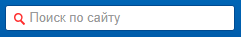

*(подсказка: изучите внимательно документацию и метод send_keys)*

In [ ]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 995 kB 464 kB/s 
     |████████████████████████████████| 140 kB 664 kB/s 
     |████████████████████████████████| 384 kB 162 kB/s 
     |████████████████████████████████| 58 kB 539 kB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [ ]:
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [913 kB]
Get:13 

In [ ]:
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import csv

service = Service(executable_path='/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument('--start-maximized')
chrome_options.add_argument("--no-sandbox")
driver = webdriver.Chrome(service=service, options=chrome_options)
try:
    url = "https://1000kem.ru/contacts/"
    driver.set_window_size(1024, 600)
    driver.maximize_window()
    driver.get(url)
    SearchInput = driver.find_element(By.XPATH, '//*[@id="title-search-input"]')
    driver.implicitly_wait(10)
    SearchInput.send_keys("Lenovo")
    action = ActionChains(driver)
    action.send_keys(Keys.ENTER).perform()
    time.sleep(10)
    lenovo = driver.find_elements(By.CSS_SELECTOR, 'font.notetext')
    for name in lenovo[:5]:
      print(name.text)


except Exception as ex:
    print(ex)
driver.quit()

К сожалению, на ваш поисковый запрос ничего не найдено.


*2. НЕОБЯЗАТЕЛЬНОЕ
Написать код, который выполнит ввод слова "Lenovo" в поисковую строку сайта  nbcomputers.ru (https://www.nbcomputers.ru/) и нажмет кнопку "Найти"
<br>
<br>
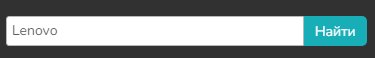

*(подсказка: изучите внимательно документацию и метод send_keys)*

In [ ]:
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import csv

service = Service(executable_path='/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument('--start-maximized')
chrome_options.add_argument("--no-sandbox")
driver = webdriver.Chrome(service=service, options=chrome_options)
try:
    url = "http://nbcomputers.ru/"
    driver.set_window_size(1024, 600)
    driver.maximize_window()
    driver.get(url)
    SearchInput = driver.find_element(By.XPATH, '//*[@id="#headerContent"]/div[2]/div[5]/div/label/span/input')
    driver.implicitly_wait(10)
    SearchInput.send_keys("Lenovo")
    action = ActionChains(driver)
    but = driver.find_element(By.XPATH, "//button[@type='submit']")
    action.move_to_element(but)
    action.send_keys(Keys.ENTER).perform()
    time.sleep(10)
    lenovo = driver.find_elements(By.CSS_SELECTOR, 'div.digi-product')
    for name in lenovo[:5]:
      print(name.text)


except Exception as ex:
    print(ex)
driver.quit()

Код: 112817
134 990 ₽
Lenovo Ноутбук Lenovo Legion 5 15ACH6 15,6", белый
Подробнее
Код: 111783
128 990 ₽
Lenovo Ноутбук Lenovo ThinkPad E14 Gen 2 14", черный
Подробнее
Код: 111084
34 990 ₽
Lenovo Ноутбук Lenovo IdeaPad L3 15ITL6 15,6", серый
Подробнее
Код: 109789
66 990 ₽
Lenovo Ноутбук Lenovo ThinkPad E15 Gen 3 15,6", черный
Подробнее
Код: 111208
379 990 ₽
Lenovo Ультрабук Lenovo ThinkPad X1 Carbon Gen 9 14", черный
Подробнее


3. Соберите информацию с сайта nbcomputers.ru (https://www.nbcomputers.ru/catalog/noutbuki/) о ноутбуках данного интернет-магазина.
<br>
Данные, которые необходимы:
* Название ноутбука
* Цена ноутбука
* Код товара

Результат необходимо записать в CSV файл.
<br>
*(совет: обязательно делайте различные временные промежутки между прокликами)*

In [ ]:
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import csv

service = Service(executable_path='/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
driver = webdriver.Chrome(service=service, options=chrome_options)


try:
    url = "https://www.nbcomputers.ru/catalog/noutbuki/"
    driver.set_window_size(1024, 600)
    driver.maximize_window()
    action = ActionChains(driver)
    driver.get(url)
    driver.implicitly_wait(10)
    action.move_to_element(driver.find_element(By.XPATH, '//*[@id="catalog-listing"]/button'))
    action.perform()

    while True:
        WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="catalog-listing"]/button'))).click()


except Exception as ex:
    print("It's Ready")
html = driver.page_source
driver.quit()

Message: 
Stacktrace:
#0 0x55c14610b1a3 <unknown>
#1 0x55c145ed7ac3 <unknown>
#2 0x55c145f0f869 <unknown>
#3 0x55c145f0fa41 <unknown>
#4 0x55c145f436e7 <unknown>
#5 0x55c145f2d10d <unknown>
#6 0x55c145f413cc <unknown>
#7 0x55c145f2d443 <unknown>
#8 0x55c145f0348b <unknown>
#9 0x55c145f04975 <unknown>
#10 0x55c1461872a0 <unknown>
#11 0x55c14614281a <unknown>
#12 0x55c14614234a <unknown>
#13 0x55c146142e75 <unknown>
#14 0x55c14618314b <unknown>
#15 0x55c1461431de <unknown>
#16 0x55c146124c23 <unknown>
#17 0x55c14614d6b8 <unknown>
#18 0x55c14614d852 <unknown>
#19 0x55c146166b60 <unknown>
#20 0x7f8bdadf06db <unknown>



In [ ]:
from bs4 import BeautifulSoup
import csv


soup = BeautifulSoup(html, 'lxml')
notebook_cards = soup.find_all('div',{'class':'CatalogItem_Rectanglestyles__CatalogItemRectangle__Info-sc-ep8kec-1 bzAyJm'})

with open('Notebook_info.csv', 'w', encoding='utf-8') as f:
  writer = csv.writer(f)
  writer.writerow(('Название','Цена','Код'))

for notebook_info in notebook_cards:
  name = notebook_info.find('a').text.split('Перейти к товару')[0]
  price = notebook_info.find('div', {'class':'CatalogItem_Rectanglestyles__CatalogItemRectangle__Price-sc-ep8kec-4 THMvQ'}).text.split('₽')
  if len(price) > 2:
    price = price[1]
  else: 
    price = price[0]
  code_num = notebook_info.find('span', {'class':'CatalogItem_Rectanglestyles__CatalogItemRectangle__CODE-sc-ep8kec-16 SpKCm'}).text
  
  with open('Notebook_info.csv', 'a', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow((name,price,code_num))



*4. НЕОБЯЗАТЕЛЬНОЕ
Соберите информацию с сайта nbcomputers.ru (https://1000kem.ru/catalog/vse_dlya_doma_1/) о домашней утвари данного интернет-магазина.
<br>
Данные, которые необходимы:
* Название товара
* Цена

Так же данные должны быть отсортированы по уменьшению цены.
<br>
Результат необходимо записать в CSV файл.
<br>
*(совет: посмотрите в документации метод execute_script - с помощью него и языка JS можно выполнить клик по кнопке)*

In [ ]:
# document.querySelector("#ajaxpages_catalog_identifier > div.ajaxpages.personal-tabsheader > a > span.tabbg-center")
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import csv

service = Service(executable_path='/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
driver = webdriver.Chrome(service=service, options=chrome_options)


try:
    url = "https://1000kem.ru/catalog/vse_dlya_doma_1/"
    driver.set_window_size(1024, 600)
    driver.maximize_window()
    action = ActionChains(driver)
    driver.get(url)
    driver.implicitly_wait(10)
    action.move_to_element(driver.find_element(By.XPATH, '//*[@id="content"]/div[2]/div[2]/div[2]/div[1]/a[6]'))
    action.perform()
    # Кликаем два раза на сортировку по цене, по убыванию.
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="catalog_sorter"]/div[1]/div/a[3]/span[1]'))).click()
    time.sleep(1)
    WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="catalog_sorter"]/div[1]/div/a[3]/span[1]'))).click()
    
    while True: 
      driver.execute_script("document.querySelector('#ajaxpages_catalog_identifier > div.ajaxpages.personal-tabsheader > a > span.tabbg-center').click();")
      time.sleep(3)


except Exception as ex:
    print("It's Ready")

html = driver.page_source
driver.quit()

Message: javascript error: Cannot read properties of null (reading 'click')
  (Session info: headless chrome=105.0.5195.102)
Stacktrace:
#0 0x560ba8d0b1a3 <unknown>
#1 0x560ba8ad7ac3 <unknown>
#2 0x560ba8adac89 <unknown>
#3 0x560ba8adaa97 <unknown>
#4 0x560ba8adb6cd <unknown>
#5 0x560ba8b41e22 <unknown>
#6 0x560ba8b2d022 <unknown>
#7 0x560ba8b413cc <unknown>
#8 0x560ba8b2d443 <unknown>
#9 0x560ba8b0348b <unknown>
#10 0x560ba8b04975 <unknown>
#11 0x560ba8d872a0 <unknown>
#12 0x560ba8d4281a <unknown>
#13 0x560ba8d4234a <unknown>
#14 0x560ba8d42e75 <unknown>
#15 0x560ba8d8314b <unknown>
#16 0x560ba8d431de <unknown>
#17 0x560ba8d24c23 <unknown>
#18 0x560ba8d4d6b8 <unknown>
#19 0x560ba8d4d852 <unknown>
#20 0x560ba8d66b60 <unknown>
#21 0x7f306f98b6db <unknown>



In [ ]:
from bs4 import BeautifulSoup
import csv

html = html.encode('windows-1251', 'ignore')
soup = BeautifulSoup(html, 'lxml')
shop_cards = soup.find_all('div',{'class':'catalog-item_inner'})

with open('Shop_info.csv', 'w', encoding='utf-8') as f:
  writer = csv.writer(f)
  writer.writerow(('Название товара','Цена'))

for info in shop_cards:
  name = info.find('div',{'class':'catalog-item-name'}).text
  price = info.find('div',{'class':'price'}).text
  with open('Shop_info.csv', 'a', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow((name,price))

## **Задание 3. Фреймворк Scrapy**

1. Соберите информацию о заквасках с сайта pro-syr.ru (https://pro-syr.ru/zakvaski-dlya-syra/mezofilnye/)

Необходимо собрать следующие данные:
* Название продукта
* Цена
* Есть ли продукт в наличии

Результат должен быть записан в CSV файл

In [ ]:
import os
!pip install Scrapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 264 kB 5.2 MB/s 
     |████████████████████████████████| 3.1 MB 42.3 MB/s 
     |████████████████████████████████| 93 kB 2.0 MB/s 
     |████████████████████████████████| 251 kB 51.0 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████████████| 4.0 MB 42.3 MB/s 
     |████████████████████████████████| 74 kB 3.4 MB/s 
     |████████████████████████████████| 127 kB 51.5 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.6-py3-none-any.whl size=11958 sha256=4458f95db57cafde0a49ae3208620fd335230e1666b90f442b44540ec1bb52c7
  Stored in directory: /root/.cache/pip/wheels/c9/d6/6a/de198d890277cde60ca3dbebe7ae592d3b381c7d9bb2455f4d
Successfully built PyDispatcher
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstall

In [ ]:
!scrapy startproject prosyr_proj

New Scrapy project 'prosyr_proj', using template directory '/usr/local/lib/python3.7/dist-packages/scrapy/templates/project', created in:
    /content/prosyr_proj

You can start your first spider with:
    cd prosyr_proj
    scrapy genspider example example.com


In [ ]:
os.chdir('/content/prosyr_proj/prosyr_proj/spiders')

In [ ]:
%%writefile -a ProSyr.py
import scrapy
import time
from scrapy.selector import Selector

class ZakvSpider(scrapy.Spider):
    cnt = 1
    name = 'ZakvSpider'
    start_urls = ['https://pro-syr.ru/zakvaski-dlya-syra/mezofilnye/']

    def parse(self, response):
        if self.cnt != 3:
            links = response.css('div.product-thumb a::attr(href)')
            for link in links:
                time.sleep(1)
                yield response.follow(link, self.parse_book)
                
            self.cnt += 1
            link = f'https://pro-syr.ru/zakvaski-dlya-syra/mezofilnye/?page={self.cnt}'
            yield response.follow(link)
        return 'Готово'



    def parse_book(self, response):
        yield {
            'name': response.css('div.col-sm-6 h1::text').get(),
            'price': response.css('span.autocalc-product-price::text').get(),
            'availability': response.css('b.outstock::text').get()
        }

Writing ProSyr.py


In [ ]:
!scrapy runspider 'ProSyr.py' -o 'ProSyr_info.csv'

2022-09-30 04:52:01 [scrapy.utils.log] INFO: Scrapy 2.6.3 started (bot: prosyr_proj)
2022-09-30 04:52:01 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.14, cssselect 1.1.0, parsel 1.6.0, w3lib 2.0.1, Twisted 22.8.0, Python 3.7.14 (default, Sep  8 2022, 00:06:44) - [GCC 7.5.0], pyOpenSSL 22.1.0 (OpenSSL 3.0.5 5 Jul 2022), cryptography 38.0.1, Platform Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic
2022-09-30 04:52:01 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'prosyr_proj',
 'NEWSPIDER_MODULE': 'prosyr_proj.spiders',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_LOADER_WARN_ONLY': True,
 'SPIDER_MODULES': ['prosyr_proj.spiders']}
2022-09-30 04:52:01 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2022-09-30 04:52:01 [scrapy.extensions.telnet] INFO: Telnet Password: b65f37fbf8ef5b7d
2022-09-30 04:52:01 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'sc

*2. НЕОБЯЗАТЕЛЬНОЕ
Соберите информацию о подарочных наборах сайта siberia.eco (https://siberia.eco/gotovye-podarki/)

Необходимо собрать следующие данные:
* Название набора
* Цена
* Состав набора

Результат должен быть записан в CSV файл

In [ ]:
%%writefile -a Siberia.py
import scrapy
import time
from scrapy.selector import Selector

class GiftsSpider(scrapy.Spider):
    cnt = 1
    name = 'GiftsSpider'
    start_urls = ['https://siberia.eco/gotovye-podarki/']

    def parse(self, response):
        if self.cnt != 3:
            links = response.css('div.card-borders a::attr(href)')
            for link in links:
                time.sleep(1)
                yield response.follow(link, self.parse_book)
                



    def parse_book(self, response):
        yield {
            'name': response.css('h1.global-header__title::text').get(),
            'price': response.css('span.s-price::text').get(),
            'structure': response.css('div.s-product-desc a::text').getall()
        }


Writing Siberia.py


In [ ]:
!scrapy runspider 'Siberia.py' -o 'Gifts_info.csv'

2022-09-30 04:56:49 [scrapy.utils.log] INFO: Scrapy 2.6.3 started (bot: prosyr_proj)
2022-09-30 04:56:49 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.14, cssselect 1.1.0, parsel 1.6.0, w3lib 2.0.1, Twisted 22.8.0, Python 3.7.14 (default, Sep  8 2022, 00:06:44) - [GCC 7.5.0], pyOpenSSL 22.1.0 (OpenSSL 3.0.5 5 Jul 2022), cryptography 38.0.1, Platform Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic
2022-09-30 04:56:49 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'prosyr_proj',
 'NEWSPIDER_MODULE': 'prosyr_proj.spiders',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_LOADER_WARN_ONLY': True,
 'SPIDER_MODULES': ['prosyr_proj.spiders']}
2022-09-30 04:56:49 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2022-09-30 04:56:49 [scrapy.extensions.telnet] INFO: Telnet Password: e28b6e5cc6938e81
2022-09-30 04:56:49 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'sc